In [4]:
import  cv2
import  numpy as np
import  matplotlib.pyplot as plt
from    matplotlib.colors import LogNorm
from    scipy.fftpack import fft2,ifft2,fftshift,ifftshift
from    scipy.ndimage import gaussian_filter
from    scipy.signal import fftconvolve

(630, 630)


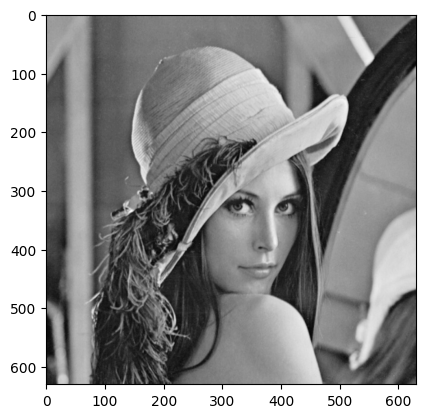

In [5]:
Lenna = cv2.imread('Lenna.jpg',0)
print(Lenna.shape)

plt.imshow(Lenna,cmap='gray')

FUNCIONES para gráficas

In [11]:


# Graficas los puntos
def surface_plot (matrix, **kwargs):
    # acquire the cartesian coordinate matrices from the matrix
    # x is cols, y is rows
    (x, y) = np.meshgrid(np.arange(matrix.shape[1]), np.arange(matrix.shape[0]))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x, y, matrix, **kwargs)
    return (fig, ax, surf)

# Graficar espectro del programa
def plot_spectrum(X_ft,centered=True):
    # A logarithmic colormap
    if centered:
      X_ftc = fftshift(X_ft)
    else:
      X_ftc = X_ft
    plt.imshow(np.abs(X_ftc), norm=LogNorm(vmin=5))
    plt.colorbar()

La imagen original es transformada de ida y de vuelta (sin procesar)


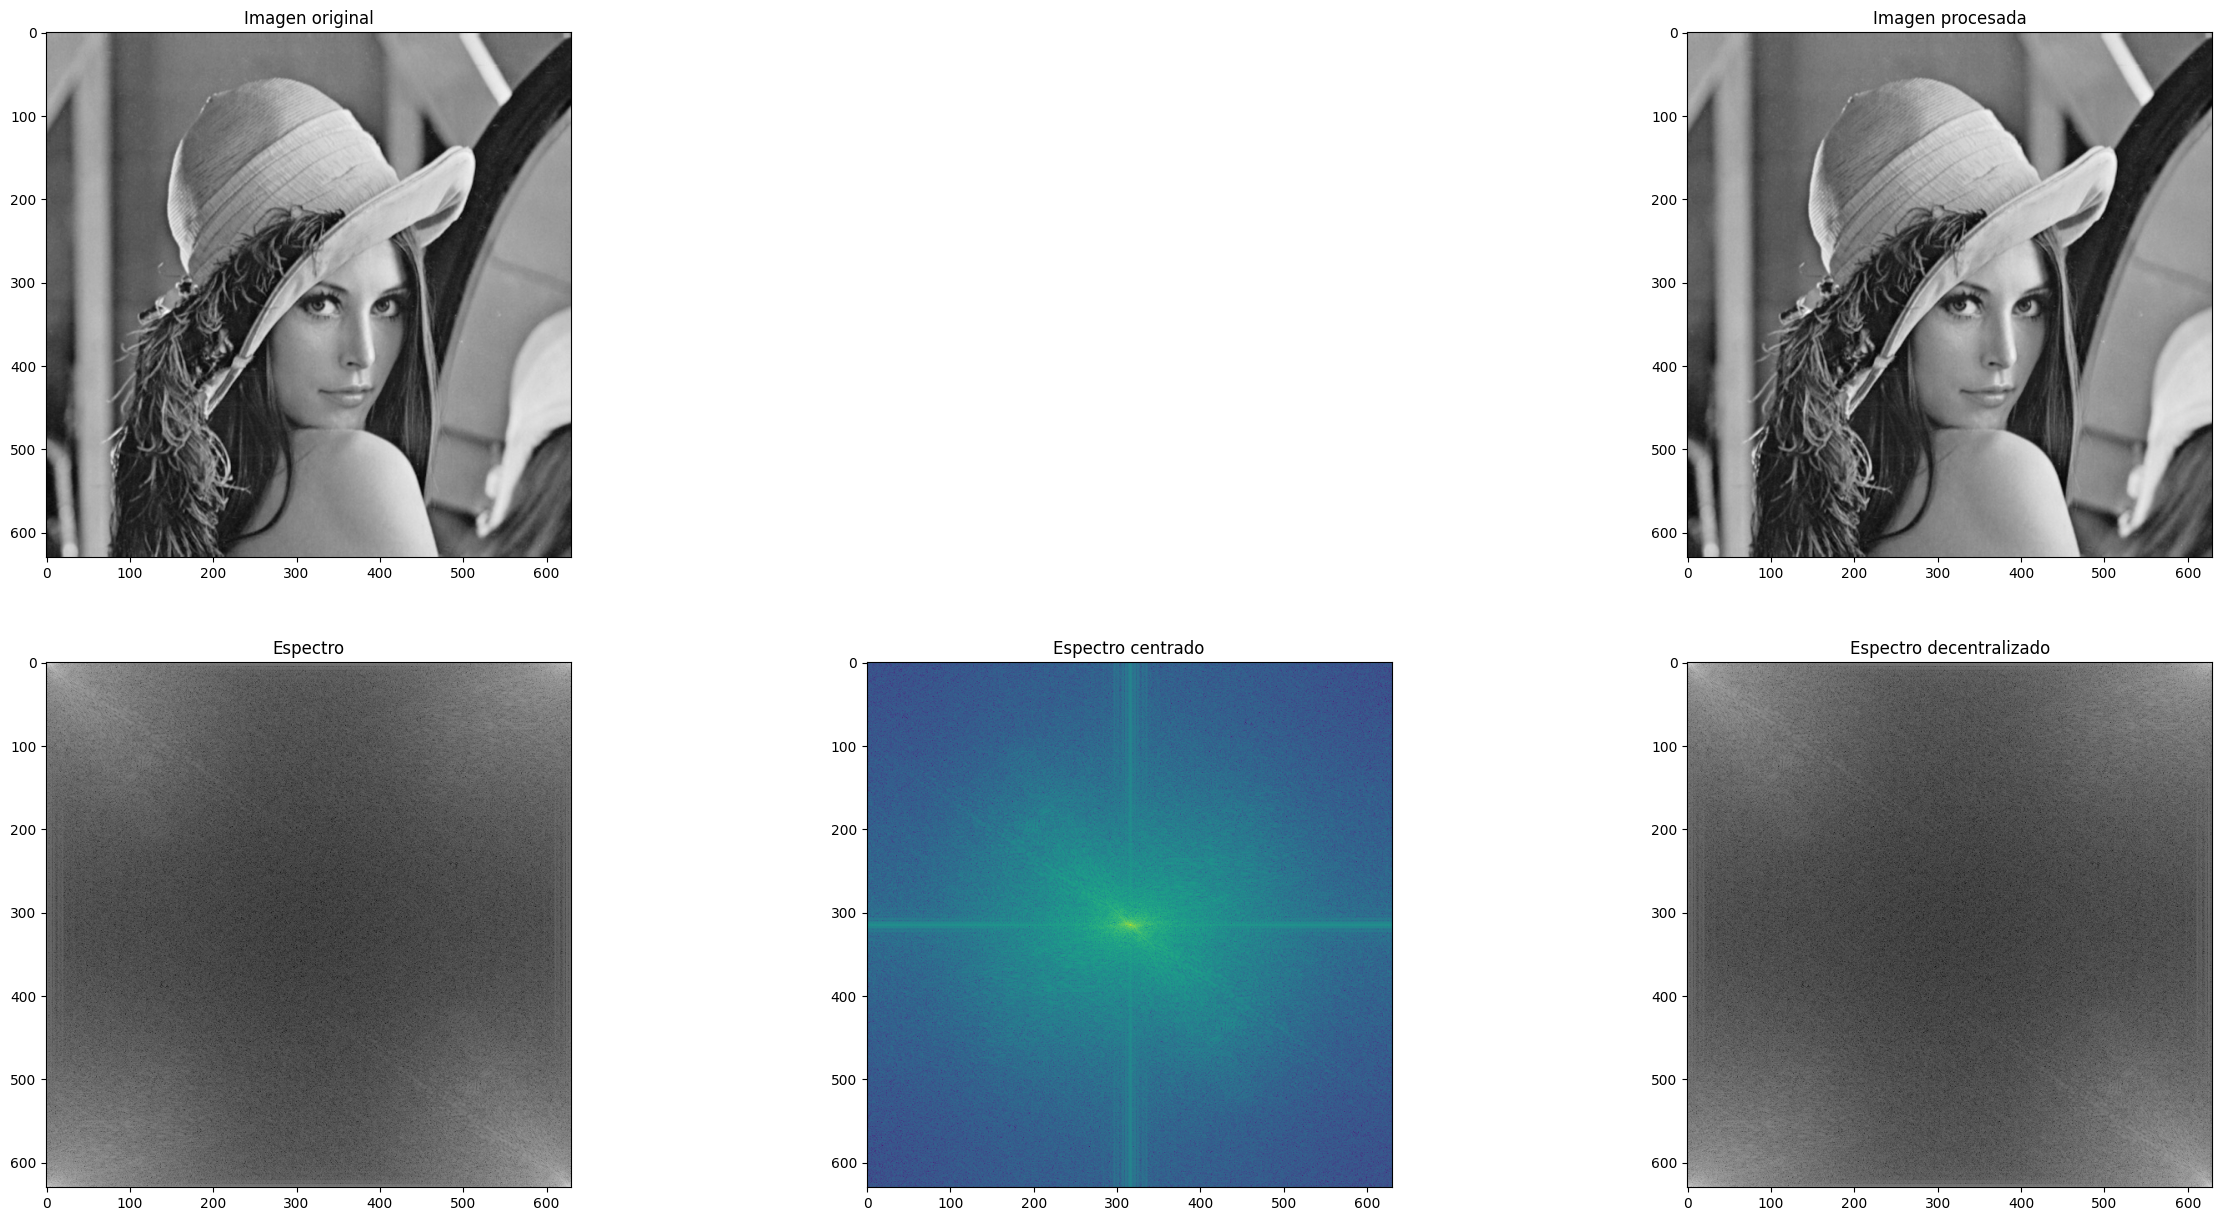

In [7]:
# La imagen original es transformada de ida y de vuelta (sin procesar)

plt.figure(figsize=(30,15))

plt.subplot(231), plt.imshow(Lenna, "gray"), plt.title("Imagen original")

# Transformada a frecuencia
Lenna_ft = fft2(Lenna)
plt.subplot(234), plt.imshow(np.log(1+np.abs(Lenna_ft)), "gray"), plt.title("Espectro")

# Transformacion de la grafica para mejor visualizacion
Lenna_ftc = fftshift(Lenna_ft)
plt.subplot(235), plt.imshow(np.log(1+np.abs(Lenna_ftc)), "gray"), plt.title("Espectro centrado")

# Transformación inversa de la grafica para pasarla a espacio
Lenna_ft_inv = ifftshift(Lenna_ftc)
plt.subplot(236), plt.imshow(np.log(1+np.abs(Lenna_ft_inv)), "gray"), plt.title("Espectro decentralizado")

# Transformada inversa para regresarlo al espacio
Lenna_new = ifft2(Lenna_ft_inv)
# X_new = ifft2(X_ftc)
plt.subplot(233), plt.imshow(np.abs(Lenna_new), "gray"), plt.title("Imagen procesada")

plt.show()

Espectro arreglado a color

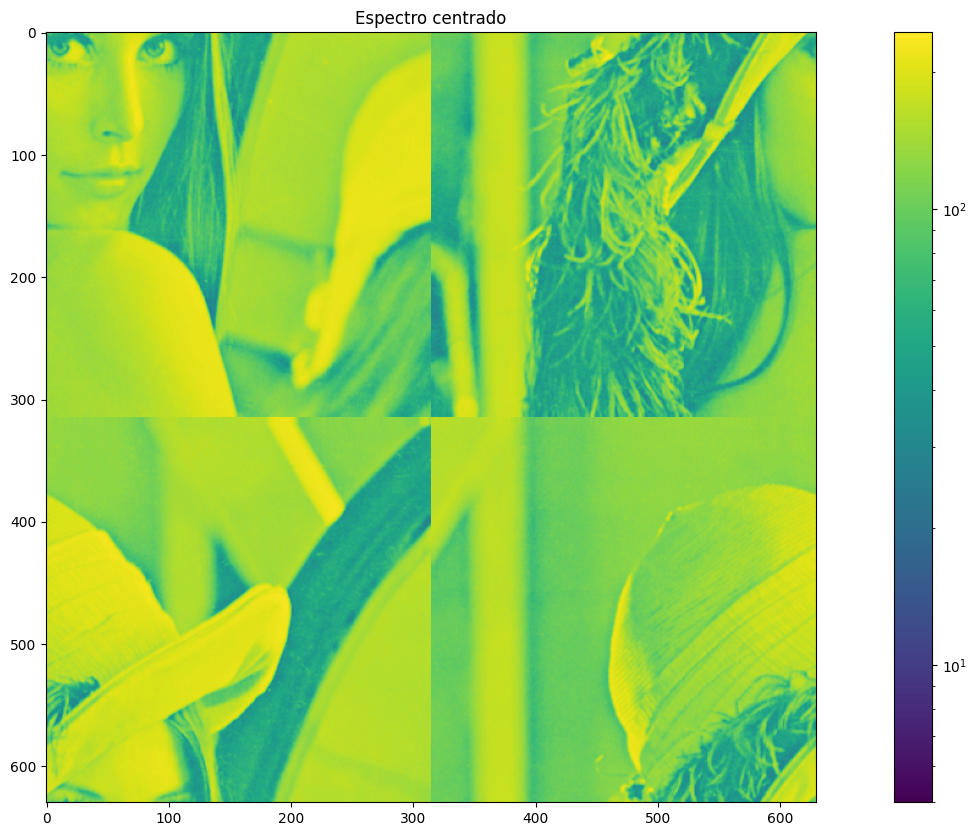

In [12]:
plt.figure(figsize=(20,10))
plot_spectrum(Lenna)
plt.title('Espectro centrado')
plt.show()